In [66]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob

In [71]:
#import news data

news_data = pd.read_csv('C:/Users/hp/kifiya_10_acadamy/dataset/raw_analyst_ratings.csv')

news_data['date'] = pd.to_datetime(news_data['date'], errors='coerce')


In [72]:
#import stock data of apple
stock_data = pd.read_csv("C:/Users/hp/kifiya_10_acadamy/dataset/AAPL_historical_data.csv")


stock_data["Date"] = pd.to_datetime(stock_data["Date"]).dt.date

print(stock_data)

             Date        Open        High         Low       Close   Adj Close  \
0      1980-12-12    0.128348    0.128906    0.128348    0.128348    0.098943   
1      1980-12-15    0.122210    0.122210    0.121652    0.121652    0.093781   
2      1980-12-16    0.113281    0.113281    0.112723    0.112723    0.086898   
3      1980-12-17    0.115513    0.116071    0.115513    0.115513    0.089049   
4      1980-12-18    0.118862    0.119420    0.118862    0.118862    0.091630   
...           ...         ...         ...         ...         ...         ...   
10993  2024-07-24  224.000000  224.800003  217.130005  218.539993  218.287323   
10994  2024-07-25  218.929993  220.850006  214.619995  217.490005  217.238556   
10995  2024-07-26  218.699997  219.490005  216.009995  217.960007  217.708008   
10996  2024-07-29  216.960007  219.300003  215.750000  218.240005  217.987686   
10997  2024-07-30  219.190002  220.330002  216.119995  218.800003  218.547043   

          Volume  Dividends

In [44]:

# Ensure there are no missing values
news_data = news_data.dropna(subset=["headline"])



In [45]:
#sentiment analysis of news data headlines

from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Initialize VADER
sia = SentimentIntensityAnalyzer()

# Function to calculate VADER sentiment
def get_vader_sentiment(text):
    score = sia.polarity_scores(text)
    return score["compound"]  # Compound score summarizes polarity (-1 to 1)

# Apply VADER
news_data["sentiment"] = news_data["headline"].apply(get_vader_sentiment)

# Display results
print(news_data[["headline", "sentiment"]])


                                                  headline  sentiment
0                  Stocks That Hit 52-Week Highs On Friday     0.0000
1               Stocks That Hit 52-Week Highs On Wednesday     0.0000
2                            71 Biggest Movers From Friday     0.0000
3             46 Stocks Moving In Friday's Mid-Day Session     0.0000
4        B of A Securities Maintains Neutral on Agilent...     0.2960
...                                                    ...        ...
1407323             Top Narrow Based Indexes For August 29     0.2023
1407324  Recap: Wednesday's Top Percentage Gainers and ...    -0.3818
1407325  UPDATE: Oppenheimer Color on China Zenix Auto ...     0.0000
1407326  Oppenheimer Initiates China Zenix At Outperfor...     0.0000
1407327  China Zenix Auto International Opens For Tradi...     0.0000

[1407328 rows x 2 columns]


In [46]:
# Aggregate sentiment scores by date
daily_sentiment = news_data.groupby("date")["sentiment"].mean().reset_index()
print(daily_sentiment)


                           date  sentiment
0     2011-04-27 21:01:48-04:00     0.0000
1     2011-04-28 13:49:29-04:00     0.0000
2     2011-04-28 15:00:36-04:00     0.2500
3     2011-04-29 13:47:06-04:00     0.0000
4     2011-04-29 16:11:05-04:00     0.7351
...                         ...        ...
36006 2020-06-11 16:49:41-04:00     0.0000
36007 2020-06-11 16:51:33-04:00     0.2732
36008 2020-06-11 17:01:39-04:00    -0.2500
36009 2020-06-11 17:11:20-04:00     0.4215
36010 2020-06-11 17:12:35-04:00     0.0000

[36011 rows x 2 columns]


In [49]:
# Rename column to 'date' if needed
stock_data.rename(columns={"Date": "date"}, inplace=True)
daily_sentiment.rename(columns={"Date": "date"}, inplace=True)


In [50]:
# Convert timestamps to datetime and extract the date
stock_data["date"] = pd.to_datetime(stock_data["date"]).dt.date
daily_sentiment["date"] = pd.to_datetime(daily_sentiment["date"]).dt.date


In [51]:
print(stock_data["date"].dtype)
print(daily_sentiment["date"].dtype)


object
object


In [59]:
#Aligning sentiment score with stock close on same date

aligned_data = pd.merge(stock_data, daily_sentiment, on="date", how="inner")
co_x=['Open','High','Low','Adj Close','Volume','Dividends','Stock Splits']
aligned_Data=aligned_data.drop(columns = co_x )
print(aligned_Data)

             date      Close  sentiment
0      2011-04-27  12.505357     0.0000
1      2011-04-28  12.383929     0.0000
2      2011-04-28  12.383929     0.2500
3      2011-04-29  12.504643     0.0000
4      2011-04-29  12.504643     0.7351
...           ...        ...        ...
35548  2020-06-11  83.974998     0.0000
35549  2020-06-11  83.974998     0.2732
35550  2020-06-11  83.974998    -0.2500
35551  2020-06-11  83.974998     0.4215
35552  2020-06-11  83.974998     0.0000

[35553 rows x 3 columns]


In [74]:
# Calculate daily returns
aligned_Data['Daily_Return'] = aligned_data['Close'].pct_change()

# Display the result
print("\nStock Data with Daily Returns:")
print(aligned_Data)



Stock Data with Daily Returns:
             date      Close  sentiment  Daily_Return
0      2011-04-27  12.505357     0.0000           NaN
1      2011-04-28  12.383929     0.0000     -0.009710
2      2011-04-28  12.383929     0.2500      0.000000
3      2011-04-29  12.504643     0.0000      0.009748
4      2011-04-29  12.504643     0.7351      0.000000
...           ...        ...        ...           ...
35548  2020-06-11  83.974998     0.0000      0.000000
35549  2020-06-11  83.974998     0.2732      0.000000
35550  2020-06-11  83.974998    -0.2500      0.000000
35551  2020-06-11  83.974998     0.4215      0.000000
35552  2020-06-11  83.974998     0.0000      0.000000

[35553 rows x 4 columns]


In [76]:
#compute correlation between news sentiment and daily returns
correlation = aligned_Data["sentiment"].corr(aligned_Data["Daily_Return"])

# Print correlation result
print(f"Correlation between Sentiment Score and daily Stock returns:",correlation)


Correlation between Sentiment Score and daily Stock returns: -0.004703496517989685


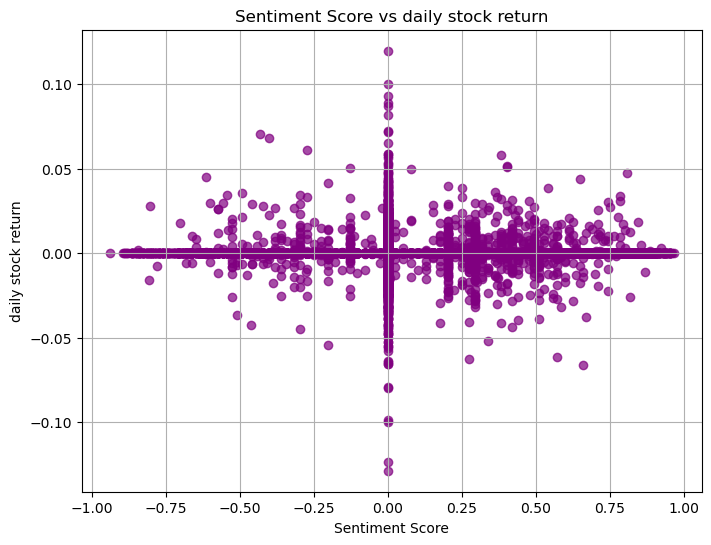

In [78]:
# Scatter plot for sentiment score vs daily stock return

plt.figure(figsize=(8, 6))
plt.scatter(aligned_Data["sentiment"], aligned_Data["Daily_Return"], color="purple", alpha=0.7)
plt.title("Sentiment Score vs daily stock return")
plt.xlabel("Sentiment Score")
plt.ylabel("daily stock return")
plt.grid()
plt.show()



In [77]:
# Compute correlation between news sentiment and stock close
correlation = aligned_Data["sentiment"].corr(aligned_Data["Close"])

# Print correlation result
print(f"Correlation between Sentiment Score and Stock Close Price: ",correlation)



Correlation between Sentiment Score and Stock Close Price:  -0.03653365710825846


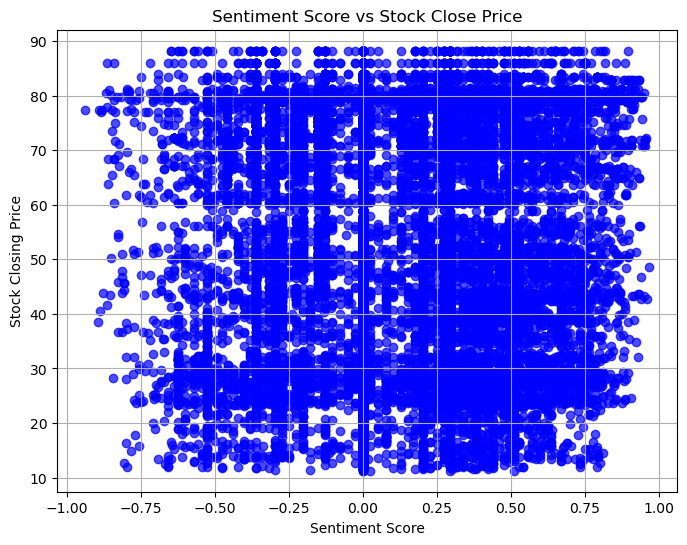

In [70]:

# Scatter plot for sentiment score vs stock price

plt.figure(figsize=(8, 6))
plt.scatter(aligned_Data["sentiment"], aligned_Data["Close"], color="blue", alpha=0.7)
plt.title("Sentiment Score vs Stock Close Price")
plt.xlabel("Sentiment Score")
plt.ylabel("Stock Closing Price")
plt.grid()
plt.show()

